In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal
import math
from numpy.linalg import inv
from numpy import matmul as mm
import scipy
from scipy.linalg import lu_factor,lu_solve
from scipy.linalg import cho_factor,cho_solve
from scipy.stats import multivariate_normal

## Ridge Regression with Gradient Descent

### Linear Regression
$$ f(x) = w_1+w_2x$$
Assume that the prior distribution of the weight is, 
$$p(\mathbf{w})=\mathcal{N}(0,\mathbf{I})$$
The observed data is given by,
$$y=f(x)+\epsilon$$
where $\epsilon \sim \mathcal{N}(0,\sigma^2)$.

### Residual sum of squares (RSS)
$$RSS=e^2_1+e^2_2+\cdots+e^2_n$$
where $e_i=y_i-\hat{y}_i=y_i-\hat{w}_1-\hat{w}_2x_i$.

### Loss function with regularisation
$$L = MSE+\lambda\|\mathbf{w}\|^2_2 = \frac{1}{N}\sum^N_{i=1}\big(y_i-\mathbf{w}^\top x_i\big)^2+\lambda \mathbf{w}^\top\mathbf{w}$$

In [2]:
w1, w2 = np.mgrid[-5:5:.02, -5:5:.02]
pos = np.dstack((w1, w2))
print(w1.shape, w2.shape)

(500, 500) (500, 500)


In [3]:
x = np.array([[-5,2,5]])
x_ = np.vstack((np.array([1,1,1]),x))
w = np.random.randn(1,2)
n = np.random.randn(1,3)
y = mm(w,x_)+n
print(x,y,w)
print(x.shape,y.shape)

[[-5  2  5]] [[ 3.12572285 -1.01572439 -6.43707783]] [[-0.63959897 -0.71648091]]
(1, 3) (1, 3)


In [4]:
y.shape

(1, 3)

In [5]:
sqrt_diff = (y-(np.expand_dims(w1,axis=2)+np.expand_dims(w2,axis=2)*x))**2
rss = np.sum(sqrt_diff,axis=2)
print(rss.shape)

(500, 500)


[[-0.63959897 -0.71648091]]


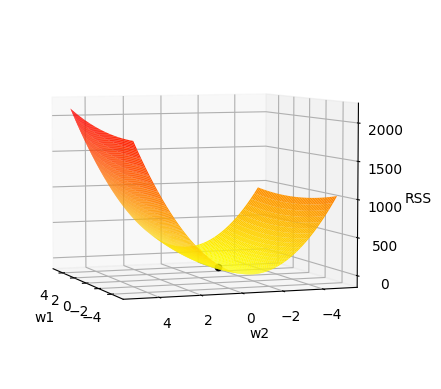

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(w1,w2, rss, cmap="autumn_r")
ax.scatter(w[0,0],w[0,1],0,marker='o',color='black')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('RSS')
print(w)
ax.view_init(5, 160)

[[-0.63959897 -0.71648091]]


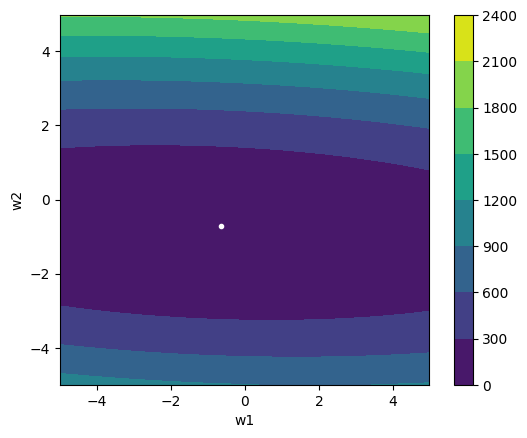

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(w1,w2,rss)
ax.plot(w[0,0],w[0,1],'w.')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
fig.colorbar(cs)
ax.set_aspect(1)
print(w)

### Closed Form Solution
$$p(\mathbf{w}|\mathbf{X},\mathbf{y})\sim\mathcal{N}(\frac{1}{\sigma^2}A^{-1}Xy,A^{-1})$$
where $A = \sigma^{-2}XX^\top+\mathbf{I}$.

In [8]:
A = mm(x_,x_.T)+np.identity(2)
tmp = lu_solve(lu_factor(A), x_)
w_est = mm(tmp,y.T).T

[[-0.64027065 -0.88299838]] [[-0.63959897 -0.71648091]]


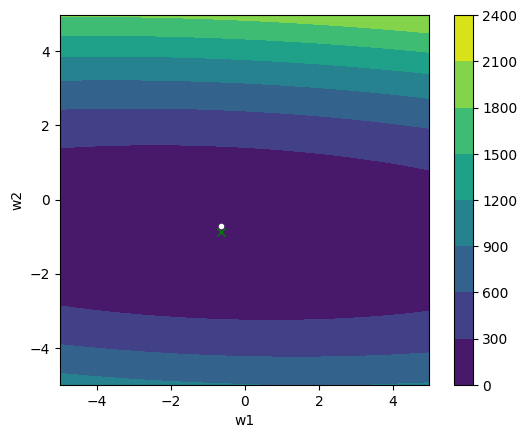

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(w1,w2,rss)
ax.plot(w[0,0],w[0,1],'w.')
ax.plot(w_est[0,0],w_est[0,1],'gx')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
fig.colorbar(cs)
ax.set_aspect(1)
print(w_est,w)

### Gradient Descent
$$\mathbf{w} \leftarrow \mathbf{w}-\alpha\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w}-\alpha\big(\frac{-2}{n}\mathbf{x}^\top(\mathbf{y}-\mathbf{w}^\top\mathbf{x})+2\lambda\mathbf{w}\big)$$

In [10]:
w_init = np.array([[4.,4.]])
w_hist = [w_init]
alpha, num_iters = 1e-3, 5000
for i in range(num_iters):
    grad = -2*mm(y-mm(w_init,x_), x_.T)/3+2*w_init
    w_init = w_init-alpha*grad
    w_hist.append(w_init)
w_hist = np.vstack(w_hist)

[[-0.64027065 -0.88299838]] [[-0.63959897 -0.71648091]]


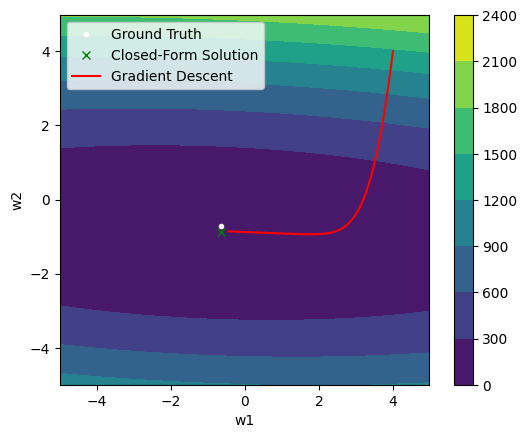

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w[0,0],w[0,1],'w.')
ax.plot(w_est[0,0],w_est[0,1],'gx')
ax.plot(w_hist[:,0],w_hist[:,1], 'r-')
cs = ax.contourf(w1,w2,rss)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
fig.colorbar(cs)
ax.set_aspect(1)
ax.legend(['Ground Truth','Closed-Form Solution','Gradient Descent'])
print(w_est,w)

In [12]:
print('Ground truth weight: ', w)
print('Closed-Form Solution: ', w_est)
print('Gradient Descent Solution: ', w_init)

Ground truth weight:  [[-0.63959897 -0.71648091]]
Closed-Form Solution:  [[-0.64027065 -0.88299838]]
Gradient Descent Solution:  [[-0.43477105 -0.85922649]]


### References
1. https://machinelearningcompass.com/machine_learning_models/ridge_regression/